__Name__: Ameen Oladehinde-Bello
__Student Number__: 21034095

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.manifold import TSNE, MDS, SpectralEmbedding
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [160]:
random.seed(42)

### Load and Prepare the Data for Clustering

In [161]:
data = pd.read_csv('loans_train_prepared.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [162]:
data.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305


In [163]:
data.describe()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.916588,1.076222,0.713355,0.855049,0.796417,0.021173,0.648208,0.004886,0.133550,0.052117,0.218241,0.379479,0.328990,0.687296,0.862686
std,0.336541,0.412366,0.338744,0.134226,0.352339,0.402991,0.144077,0.477919,0.069786,0.340446,0.222445,0.413389,0.485653,0.470229,0.463973,0.428068
min,0.000000,0.004634,0.005026,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005599
25%,0.000000,0.662440,0.883668,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.597383
50%,0.000000,0.815365,1.047319,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.783902
75%,0.333333,1.078246,1.229571,0.750000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.035796
max,1.000000,3.357480,2.461145,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.207353


The data in the dataset is all numerical, but the values for each feature are all in different scales. We will scale all the values using the min max scaler to have all values be in the range 0 to 1

In [164]:
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [165]:
scaled_data[0:5]

array([[0.        , 0.32208146, 0.42877167, 0.74358974, 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.26094651],
       [0.33333333, 0.27476636, 0.42436587, 0.74358974, 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.27051167],
       [0.        , 0.2025815 , 0.25686637, 0.74358974, 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.11855695],
       [0.        , 0.1802524 , 0.40624988, 0.74358974, 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.22219459],
       [0.        , 0.32725488, 0.45218651, 0.74358974, 1.        ,
        1.        , 0.        , 

### Clustering using the Elbow Method

Below we will use the Elbow method for determining the optimal value for K that we will use to cluster the scaled dataset. We will use a range of k values from 1 to 10. The Elbow method works by plotting the value of k against the SSE values of each corresponding kmeans result. The optimal value of kK is chosen by finding a small value of K where changed in the graph after that point are diminishing/not changing much from one value to the next.

Text(0, 0.5, 'SSE')

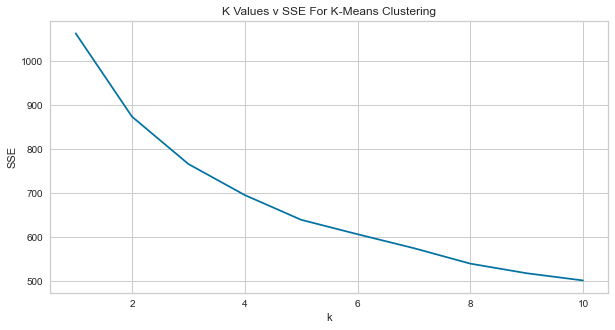

In [166]:
sse_values = []
k_values = np.arange(1,11)
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, max_iter=1000).fit(scaled_data)
    sse_values.append(kmeans_model.inertia_)
plt.figure(figsize=(10,5))
plt.plot(k_values, sse_values)
plt.title("K Values v SSE For K-Means Clustering")
plt.xlabel("k")
plt.ylabel("SSE")

From the graph above there does not look to be a well-defined elbow in this graph. However, it does look like after k = 5 the values of SSE from this point on start to diminish very gradually and not by much from point to point. Based on this we will choose the optimal value for K for the elbow method to be 5.

### Clustering using the Silhouette Method

Using the scaled dataset we will use the silhouette method to find an optimal value for K. This method works by finding the value of K that yields the highest silhouette coefficient, where this coefficient combines the mean distance between a sample and the rest of the points in its class and the mean distance between a point and all the other points in the next  nearest cluster.

For this experiment we will use the same range of values of K

Text(0, 0.5, 'Silhouette Score')

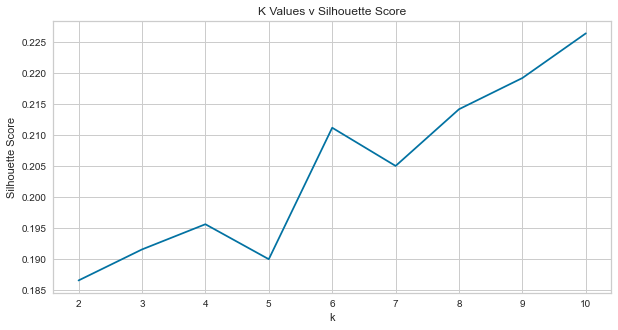

In [167]:
sil_values = []
for k in range(2,11):
    k_means = KMeans(n_clusters=k, max_iter=1000).fit(scaled_data)
    labels = k_means.labels_
    sil_score = silhouette_score(scaled_data, labels, metric='euclidean')
    sil_values.append(sil_score)
plt.figure(figsize=(10,5))
plt.plot(np.arange(2,11), sil_values)
plt.title("K Values v Silhouette Score")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

Since we do not know much about the context of the dataset (don't know what the target variable is and how many classes there are) we can take the result of the silhouette method here as bond and go for a value of 10 as the optimal value of K for the range of K values from 2 to 10.

### Choosing Suitable Value for K and Visualising Clusters
Based on the idea that we would like a number of clusters that will provide a meaningful interpretation and meaningful information, the best value of k based on the two experiments above would 5. Using the silhouette value of 10 for a dataset that contained only 614 data points would not meet the aim of providing clusters of meaningful value.

The plot below use MDS and TSNE manifold techniques to project the initial multidimensional data into only 2 dimensions so that the data can be correctly visualised along with the clusters that each data point belongs t

In [168]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatter_plot(points, labels, centers, title):

    plt.figure(figsize=(8,8))
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)
        
    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [169]:
optimal_k  = 5
kmeans_model = KMeans(n_clusters=optimal_k, max_iter=1000).fit(scaled_data)

In [170]:
cluster_centers = kmeans_model.cluster_centers_

In [171]:
scaled_data_and_centers = np.r_[scaled_data, cluster_centers]
scaled_data_and_centers.shape

(619, 16)

transformed data shape: (619, 2)


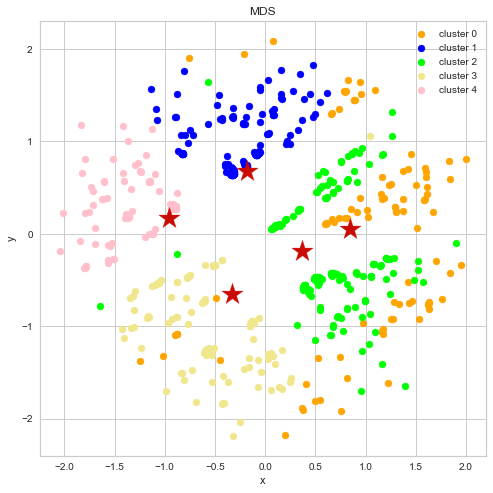

In [172]:
xy_coord = MDS(n_components=2).fit_transform(scaled_data_and_centers)
print(f"transformed data shape: {xy_coord.shape}")
clustering_scatter_plot(points=xy_coord[:-optimal_k,:],
                        labels=kmeans_model.labels_,
                        centers=xy_coord[-optimal_k:,:],
                        title='MDS')

/Users/ameenoladehinde-bello/opt/anaconda3/envs/FI6161/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/ameenoladehinde-bello/opt/anaconda3/envs/FI6161/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


transformed data shape: (619, 2)


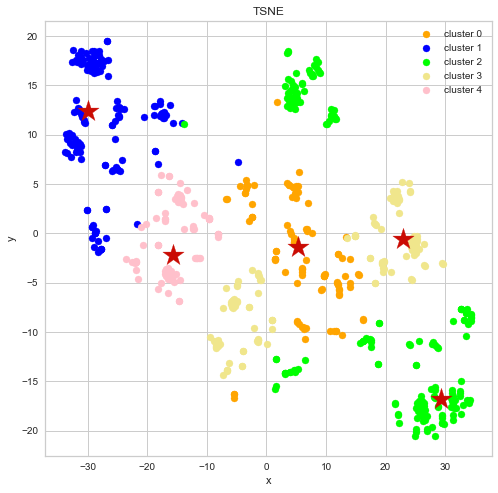

In [173]:
xy_coord_tsne = TSNE(n_components=2, init='pca').fit_transform(scaled_data_and_centers)
print(f"transformed data shape: {xy_coord.shape}")
clustering_scatter_plot(points=xy_coord_tsne[:-optimal_k,:],
                        labels=kmeans_model.labels_,
                        centers=xy_coord_tsne[-optimal_k:,:],
                        title='TSNE')

From the TSNE plot we can see that we have some well-defined clusters in the data, looking at the orange cluster however and its odd position we can most likely conclusde that the optimal number of clusters for this dataset could be 4 as well as 5.

To analyse the nature of the clusters that have been found by our kmeans algorithm, the labels obtained by the kmeans algorithm will be appended onto the original dataset.

In [174]:
data.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305


In [175]:
data['cluster'] = kmeans_model.labels_
data.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,3
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,0
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,2
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,2
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,3


In [176]:
data.groupby('cluster').size()

cluster
0    100
1    135
2    177
3    120
4     82
dtype: int64

In [177]:
data.groupby('cluster').mean().T

cluster,0,1,2,3,4
Dependents,0.303333,0.308642,0.357815,0.075000,0.097561
ApplicantIncome,0.901266,0.922554,0.946027,0.871047,0.928556
LoanAmount,1.101772,1.119394,1.123909,0.987784,1.000477
Loan_Amount_Term,0.696750,0.720741,0.694209,0.738542,0.725915
Credit_History,0.320000,0.985185,0.994350,0.950000,0.853659
Gender_Male,0.870000,0.844444,0.954802,0.616667,0.548780
Gender_nan,0.040000,0.014815,0.022599,0.008333,0.024390
Married_Yes,0.860000,1.000000,1.000000,0.000000,0.000000
Married_nan,0.000000,0.000000,0.000000,0.008333,0.024390
Self_Employed_Yes,0.140000,0.133333,0.141243,0.100000,0.158537


__Note__: Cluster 2 = C2, Cluster 3 = C3 etc.

Based on the above plots the following conclusions can be made about the data after clustering.

1. Most of the data points belong to C2
2. Least amount of data points belong to C4
3. C3 and C4 are clusters that have very few dependents
4. C0 contains majority data points that have no credit history
5. C0 - C2 is overwhelmingly male data points
6. C1 and C2 contains all married data points while C3 and C4 contain no married members
7. All clusters do not have many self-employed data points
8. C0 contains very few Loan_Status_Y data points
9. None of the data points of C0 and C4 have property in urban areas
10. All members of C1 and C4 have Property_Area_Semiurban while none have in C2 and C3

### Alternative Methods of Clustering

To keep consistent with the methods of clustering that we have used in previous experiments, that allow us to pre-define a number of clusters we would like and test this optimal number we will use `AgglomerativeClustering` method. We will use the package KElbowVisualizer from the yellowbrick package to find the correct elbow for this method of clustering. We are going to use this as there is no immediately obvious way from the documentation to find the sse values for each model (docs: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering).

The KElbowVisualizer will be used with the 'distortion' metric which is defined as `mean sum of squared distances to centers` which is essentially using the elbow method that we manually implemented above.

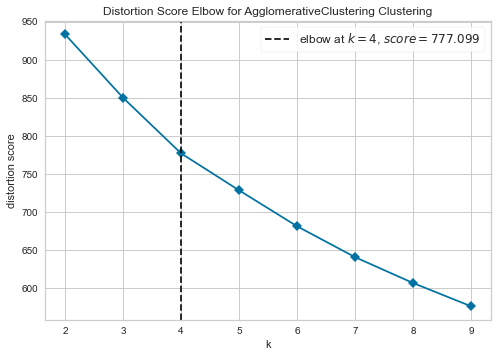

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [178]:
# Instantiate the clustering model and visualizer
agglo_clustering_model = AgglomerativeClustering()
visualizer = KElbowVisualizer(
    agglo_clustering_model, k=(2,10), metric='distortion', timings=False
)

visualizer.fit(scaled_data)
visualizer.show()

We can see from the above automated detection of K that the ideal value for K is 4, this is consistent with the assumption made earlier in the notebook about the ideal number of clusters being 4 or five. Below we will use a SpectralEmbedding to transform the dataset to 2 dimensions and plot the clusters.

In [179]:
k = 4

In [180]:
clustered_model = AgglomerativeClustering(n_clusters=k).fit(scaled_data)

In [181]:
clustered_model.labels_.shape

(614,)

In [182]:
xy = SpectralEmbedding(n_components=2).fit_transform(scaled_data)

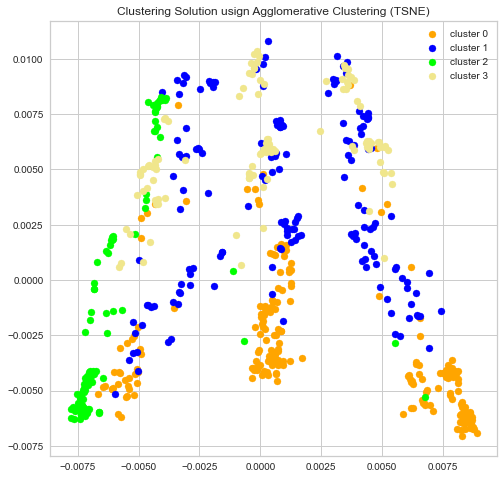

In [183]:
plt.figure(figsize=(8,8))
plt.title("Clustering Solution usign Agglomerative Clustering (TSNE)")

for i in range(k):
        h = plt.scatter(xy[clustered_model.labels_==i,0],
                        xy[clustered_model.labels_==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))
        
plt.legend()

Using SpectralEmbedding we can see that the clusters do not look very well-defined, and it is proving very difficult to determine whether the clustering algorithm has done a good job of establishing useful clusters in the data. We will use TSNE below to get a better understanding of how the clustering algorithm has performed.

/Users/ameenoladehinde-bello/opt/anaconda3/envs/FI6161/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/ameenoladehinde-bello/opt/anaconda3/envs/FI6161/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


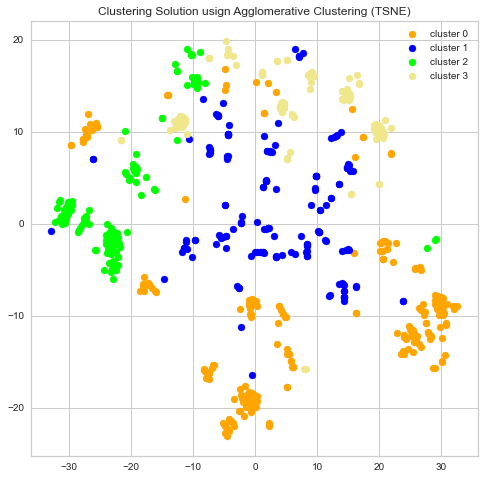

In [184]:
xy = TSNE(n_components=2, init='pca').fit_transform(scaled_data)
plt.figure(figsize=(8,8))
plt.title("Clustering Solution usign Agglomerative Clustering (TSNE)")

for i in range(k):
        h = plt.scatter(xy[clustered_model.labels_==i,0],
                        xy[clustered_model.labels_==i,1],
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

plt.legend()